## Tabular Q Learning Taxi Driver
Value-Based RL solving OpanAI gym 'Taxi' environment.

In [20]:
# qlearningAgent
# ------------------
## based on http://inst.eecs.berkeley.edu/~cs188/sp09/pacman.html

import random,math

import numpy as np
from collections import defaultdict

class QLearningAgent():
    """ Q-Learning Agent

    Instance variables you have access to
      - self.epsilon (exploration prob)
      - self.alpha (learning rate)
      - self.discount (discount rate aka gamma)

    Functions you should use
      - self.getLegalActions(state)
        which returns legal actions for a state
      - self.getQValue(state,action)
        which returns Q(state,action)
      - self.setQValue(state,action,value)
        which sets Q(state,action) := value
    """
    def __init__(self,alpha,epsilon,discount,getLegalActions):
        "We initialize agent and Q-values here."
        self.getLegalActions= getLegalActions
        self._qValues = defaultdict(lambda:defaultdict(lambda:0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def getQValue(self, state, action):
        """
          Returns Q(state,action)
        """
        return self._qValues[state][action]

    def setQValue(self,state,action,value):
        """
          Sets the Qvalue for [state,action] to the given value
        """
        self._qValues[state][action] = value

#---------------------#start of your code#---------------------#

    def getValue(self, state):
        """
          Returns max_action Q(state,action)
          where the max is over legal actions.
        """

        possibleActions = self.getLegalActions(state)
        #If there are no legal actions, return 0.0
        if len(possibleActions) == 0:
            return 0.0

        "*** YOUR CODE HERE ***"
        return np.max([self._qValues[state][action] for action in possibleActions])
    
    def getPolicy(self, state):
        """
          Compute the best action to take in a state. 

        """
        possibleActions = self.getLegalActions(state)

        #If there are no legal actions, return None
        if len(possibleActions) == 0:
            return None

        best_action = None

        "*** YOUR CODE HERE ***"
        best_action = possibleActions[np.argmax(
                [self._qValues[state][action] for action in possibleActions])]
        return best_action

    def getAction(self, state):
        """
          Compute the action to take in the current state, including exploration.  

          With probability self.epsilon, we should take a random action.
          otherwise - the best policy action (self.getPolicy).

          HINT: You might want to use util.flipCoin(prob)
          HINT: To pick randomly from a list, use random.choice(list)

        """

        # Pick Action
        possibleActions = self.getLegalActions(state)
        action = None

        #If there are no legal actions, return None
        if len(possibleActions) == 0:
            return None

        #agent parameters:
        epsilon = self.epsilon

        "*** YOUR CODE HERE ***"
        if random.random() < epsilon:
            action = random.choice(possibleActions)
        else:
            action = self.getPolicy(state)
        return action

    def update(self, state, action, nextState, reward):
        """
          You should do your Q-Value update here

          NOTE: You should never call this function,
          it will be called on your behalf


        """
        #agent parameters
        gamma = self.discount
        learning_rate = self.alpha

        "*** YOUR CODE HERE ***"    
        reference_qvalue = reward + gamma * self.getValue(nextState)

        updated_qvalue = (1-learning_rate) * self.getQValue(state,action) + learning_rate * reference_qvalue
        self.setQValue(state,action,updated_qvalue)

#---------------------#end of your code#---------------------#

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [22]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n
print('nactions', n_actions)
env.render()

INFO:gym.envs.registration:Making new env: Taxi-v2
[2017-10-18 23:08:33,538] Making new env: Taxi-v2


nactions 6
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [23]:
agent = QLearningAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [24]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward

0.04059802359226594


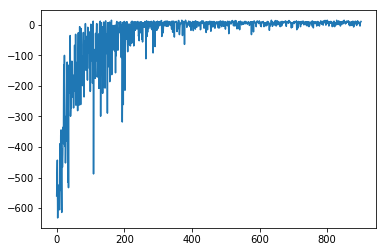

In [25]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))

    agent.epsilon *= 0.999

    if i %100 ==0:
        clear_output(True)
        print(agent.epsilon)
        plt.plot(rewards)
        plt.show()